# Mental health corpus sentiment analysis

## Introduction

The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. 

In this simple analysis, I am going to find out:

1. The word-frequency within positive and negative comments.
2. The accuracy of the model to identify the toxic comments.

## Installing libraries and loading dataset

In [36]:
#pip install nltk
#Importing NLTKT library and installing ALL from NLTK
import nltk
nltk.download('all')
#Downloading lemmatize from NLTK
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
#Downloading stop words from NLTK
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[

[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\Thuy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-t

True

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("mental_health.csv")
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


### EDA

Pie chart demonstrates the proportion of Positive and Negative Comments

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [39]:
print(data.shape)

(27977, 2)


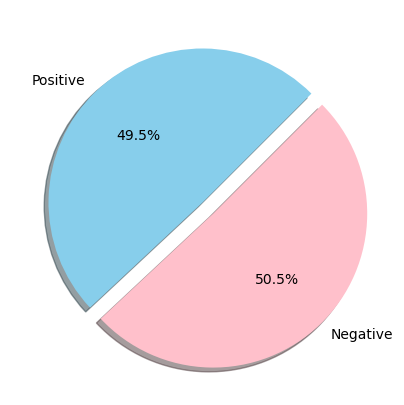

In [40]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

I import RE, that is, the regular expression operation, we use this library to remove html tagsand replace them with an empty string. 
Then I also modify the emojis/emoticons change the emojis towards the end to get a clean set of text:

In [41]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

Simplify the data and remove unnecessary complexities in text data:

In [42]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

## Data Visualization

Positive words are as follows


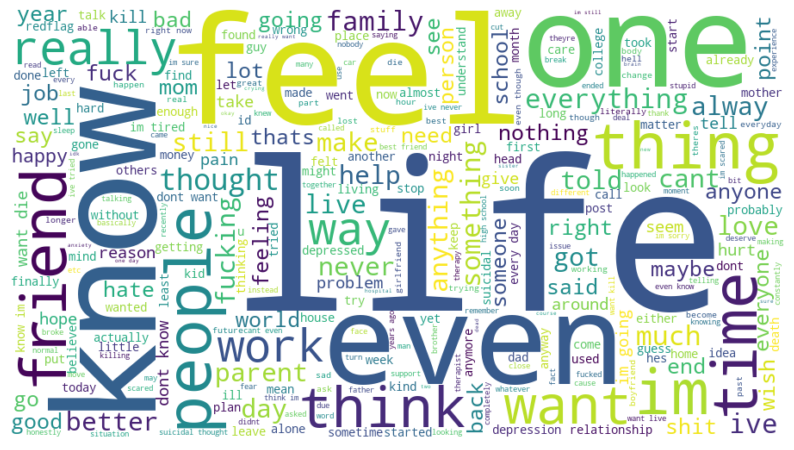

In [43]:
#comments without mental health issues 
print("Positive words are as follows")
positivetext = " ".join(data[data['label'] == 0]['text'])
plt.figure(figsize = (10, 7))
wordcloud = WordCloud(max_words=300, height= 500, width = 900,  background_color="white", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Negative words are as follows


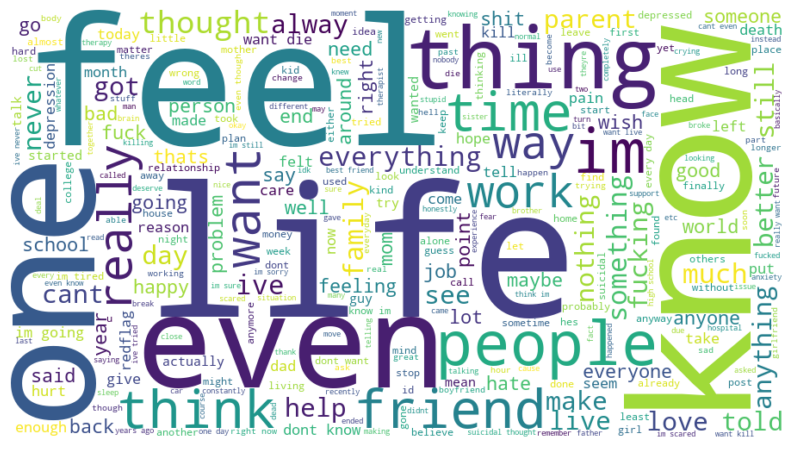

In [44]:
#comments with mental health issues 
print("Negative words are as follows")
negativetext = " ".join(data[data['label'] == 1]['text'])
plt.figure(figsize = (10, 7))
wordcloud = WordCloud(max_words=300, height= 500, width = 900,  background_color="white", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Building Machine Learning Model

 Using the TF-IDF Vertorizer to convert the raw documents into feature matrix

In [46]:
#Using the TF-IDF Vertorizer to convert the raw documents into feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

In [47]:
#Splitting the whole dataset into training set and test set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [48]:
#Building Logistic modelon the training set then check the accuracy on test set
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   32.2s remaining:   32.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   32.8s finished


Accuracy: 0.9150046465079705
